# Four stages of Data Science Pipeline
1. Sourcing and loading
2. Cleaning, transforming, and visualizing
3. Modeling
4. Evaluating and concluding

##  In this case study, I'll apply machine learning algorithms for predicting haploid rate 

# Sourcing and loading

# 1.1. Importing Libraries

In [97]:
# import libraries 
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

# 1.2. Loading the data

In [98]:
data=pd.read_csv('C:/Users/gellima/Desktop/Springboard_DScience/Data_Sci_Inhouse/set.csv')
# The dataset we're interested in contains haploids production 

In [99]:
# gets first few rows of dataframe
data.head()

,Execution_site,request_id,year,quarter,GE_ID,BreedingZone,EvaluationZone,HetGrp,type,actual_embryos,actual_haploid_embryos,Hap_rate,actual_Elle_pots,actual_D0_plants,Trans_rate,actual_D0_poll,Poll_rate
0,AZ,178950,2015,1,67133087,TE,NAWN,SSS,S,9425,1308,14,599.0,537.0,90.0,256.0,48.0
1,AZ,178955,2015,1,67133419,TE,NAWN,SSS,S,8029,1206,15,699.0,606.0,87.0,299.0,49.0
2,AZ,178969,2015,1,67226512,TE,NAWN,NSS,O,3373,976,29,466.0,270.0,58.0,196.0,73.0
3,AZ,178971,2015,1,67226501,TE,NAWN,NSS,O,4227,1189,28,518.0,310.0,60.0,184.0,59.0
4,AZ,178973,2015,1,67226717,TE,NAWN,NSS,O,5360,1277,24,623.0,516.0,83.0,286.0,55.0


In [100]:
data.shape

(14811, 17)

## 1.2.1 Data Definition

In [101]:
# column names of the dataset
data.columns

Index(['Execution_site', 'request_id', 'year', 'quarter', 'GE_ID',
       'BreedingZone', 'EvaluationZone', 'HetGrp', 'type', 'actual_embryos',
       'actual_haploid_embryos', 'Hap_rate', 'actual_Elle_pots',
       'actual_D0_plants', 'Trans_rate', 'actual_D0_poll', 'Poll_rate'],
      dtype='object')

In [102]:
# get datatypes, summary of dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14811 entries, 0 to 14810
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Execution_site          14811 non-null  object 
 1   request_id              14811 non-null  int64  
 2   year                    14811 non-null  int64  
 3   quarter                 14811 non-null  int64  
 4   GE_ID                   14811 non-null  int64  
 5   BreedingZone            14811 non-null  object 
 6   EvaluationZone          14811 non-null  object 
 7   HetGrp                  14811 non-null  object 
 8   type                    14811 non-null  object 
 9   actual_embryos          14811 non-null  int64  
 10  actual_haploid_embryos  14811 non-null  int64  
 11  Hap_rate                14811 non-null  int64  
 12  actual_Elle_pots        14807 non-null  float64
 13  actual_D0_plants        14791 non-null  float64
 14  Trans_rate              14791 non-null

In [103]:
# change year and quarter column type to object
data['year']=data['year'].astype(object)
data['quarter']=data['quarter'].astype(object)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14811 entries, 0 to 14810
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Execution_site          14811 non-null  object 
 1   request_id              14811 non-null  int64  
 2   year                    14811 non-null  object 
 3   quarter                 14811 non-null  object 
 4   GE_ID                   14811 non-null  int64  
 5   BreedingZone            14811 non-null  object 
 6   EvaluationZone          14811 non-null  object 
 7   HetGrp                  14811 non-null  object 
 8   type                    14811 non-null  object 
 9   actual_embryos          14811 non-null  int64  
 10  actual_haploid_embryos  14811 non-null  int64  
 11  Hap_rate                14811 non-null  int64  
 12  actual_Elle_pots        14807 non-null  float64
 13  actual_D0_plants        14791 non-null  float64
 14  Trans_rate              14791 non-null

In [104]:
## find number of rows and columns of the dataframe
data.shape

(14811, 17)

In [105]:
# count values of in each column
data.count()

Execution_site            14811
request_id                14811
year                      14811
quarter                   14811
GE_ID                     14811
BreedingZone              14811
EvaluationZone            14811
HetGrp                    14811
type                      14811
actual_embryos            14811
actual_haploid_embryos    14811
Hap_rate                  14811
actual_Elle_pots          14807
actual_D0_plants          14791
Trans_rate                14791
actual_D0_poll            14787
Poll_rate                 14787
dtype: int64

In [106]:
#Counts of null values 
na_df=pd.DataFrame(data.isnull().sum().sort_values(ascending=False)).reset_index()
na_df

,index,0
0,Poll_rate,24
1,actual_D0_poll,24
2,Trans_rate,20
3,actual_D0_plants,20
4,actual_Elle_pots,4
5,BreedingZone,0
6,request_id,0
7,year,0
8,quarter,0
9,GE_ID,0


In [107]:
# filter columns with sum of missing >0
na_df.columns = ['VarName', 'NullCount']
na_df[(na_df['NullCount']>0)]

,VarName,NullCount
0,Poll_rate,24
1,actual_D0_poll,24
2,Trans_rate,20
3,actual_D0_plants,20
4,actual_Elle_pots,4


In [108]:
# check duplicated rows
data1 = data[data.duplicated(keep=False)]
data1
# notice no duplicate rows

,Execution_site,request_id,year,quarter,GE_ID,BreedingZone,EvaluationZone,HetGrp,type,actual_embryos,actual_haploid_embryos,Hap_rate,actual_Elle_pots,actual_D0_plants,Trans_rate,actual_D0_poll,Poll_rate


In [109]:
## access 1st 5 rows of dataframe
data.iloc[0:5]

,Execution_site,request_id,year,quarter,GE_ID,BreedingZone,EvaluationZone,HetGrp,type,actual_embryos,actual_haploid_embryos,Hap_rate,actual_Elle_pots,actual_D0_plants,Trans_rate,actual_D0_poll,Poll_rate
0,AZ,178950,2015,1,67133087,TE,NAWN,SSS,S,9425,1308,14,599.0,537.0,90.0,256.0,48.0
1,AZ,178955,2015,1,67133419,TE,NAWN,SSS,S,8029,1206,15,699.0,606.0,87.0,299.0,49.0
2,AZ,178969,2015,1,67226512,TE,NAWN,NSS,O,3373,976,29,466.0,270.0,58.0,196.0,73.0
3,AZ,178971,2015,1,67226501,TE,NAWN,NSS,O,4227,1189,28,518.0,310.0,60.0,184.0,59.0
4,AZ,178973,2015,1,67226717,TE,NAWN,NSS,O,5360,1277,24,623.0,516.0,83.0,286.0,55.0


# 2 Data wrangling (Cleaning, transforming, and visualizing)

Data wrangling addresses following questions

Do you think you have the data you need to tackle the desired question?
Have you identified the required target value? Hap_rate
Do you have potentially useful features?
Do you have any fundamental issues with the data? 

# 2.1. Exploring data

In [110]:
# rename column name
data.rename(columns={'Execution_site':'Site','request_id':'Request_id','year':'Year','quarter':'Quarter','type':'Type','actual_embryos':'Actual_embryos','actual_haploid_embryos':'Actual_haploid_embryos','actual_Elle_pots':'Actual_Elle_pots','actual_D0_plants':'Actual_D0_plants','actual_D0_poll':'Actual_D0_poll'},inplace=True)
data.head()

,Site,Request_id,Year,Quarter,GE_ID,BreedingZone,EvaluationZone,HetGrp,Type,Actual_embryos,Actual_haploid_embryos,Hap_rate,Actual_Elle_pots,Actual_D0_plants,Trans_rate,Actual_D0_poll,Poll_rate
0,AZ,178950,2015,1,67133087,TE,NAWN,SSS,S,9425,1308,14,599.0,537.0,90.0,256.0,48.0
1,AZ,178955,2015,1,67133419,TE,NAWN,SSS,S,8029,1206,15,699.0,606.0,87.0,299.0,49.0
2,AZ,178969,2015,1,67226512,TE,NAWN,NSS,O,3373,976,29,466.0,270.0,58.0,196.0,73.0
3,AZ,178971,2015,1,67226501,TE,NAWN,NSS,O,4227,1189,28,518.0,310.0,60.0,184.0,59.0
4,AZ,178973,2015,1,67226717,TE,NAWN,NSS,O,5360,1277,24,623.0,516.0,83.0,286.0,55.0


In [111]:
data.columns

Index(['Site', 'Request_id', 'Year', 'Quarter', 'GE_ID', 'BreedingZone',
       'EvaluationZone', 'HetGrp', 'Type', 'Actual_embryos',
       'Actual_haploid_embryos', 'Hap_rate', 'Actual_Elle_pots',
       'Actual_D0_plants', 'Trans_rate', 'Actual_D0_poll', 'Poll_rate'],
      dtype='object')

In [112]:
# since GE_ID and Request_ID numeric columns contain unique values of the experiments, changing them to index
data.set_index(['Request_id','GE_ID'], inplace=True)
data.head()

,,Site,Year,Quarter,BreedingZone,EvaluationZone,HetGrp,Type,Actual_embryos,Actual_haploid_embryos,Hap_rate,Actual_Elle_pots,Actual_D0_plants,Trans_rate,Actual_D0_poll,Poll_rate
Request_id,GE_ID,,,,,,,,,,,,,,,
178950,67133087,AZ,2015,1,TE,NAWN,SSS,S,9425,1308,14,599.0,537.0,90.0,256.0,48.0
178955,67133419,AZ,2015,1,TE,NAWN,SSS,S,8029,1206,15,699.0,606.0,87.0,299.0,49.0
178969,67226512,AZ,2015,1,TE,NAWN,NSS,O,3373,976,29,466.0,270.0,58.0,196.0,73.0
178971,67226501,AZ,2015,1,TE,NAWN,NSS,O,4227,1189,28,518.0,310.0,60.0,184.0,59.0
178973,67226717,AZ,2015,1,TE,NAWN,NSS,O,5360,1277,24,623.0,516.0,83.0,286.0,55.0


# 2.2. Cleaning data

## 2.2.1 Data Cleansing: Handling missing values

In [113]:
data.isnull().sum().sort_values(ascending=False)

Poll_rate                 24
Actual_D0_poll            24
Trans_rate                20
Actual_D0_plants          20
Actual_Elle_pots           4
Hap_rate                   0
Actual_haploid_embryos     0
Actual_embryos             0
Type                       0
HetGrp                     0
EvaluationZone             0
BreedingZone               0
Quarter                    0
Year                       0
Site                       0
dtype: int64

## 2.2.2 Imputer missing data with median of the column

In [114]:
# import libraries
import pandas as pd
from sklearn.impute import SimpleImputer

# define and fit imputer
imputer = SimpleImputer(strategy='median')

# fit imputer on the dataset for column 'Age'
imputer = imputer.fit(data[['Actual_Elle_pots','Actual_D0_plants','Trans_rate','Actual_D0_poll','Poll_rate']])

# impute all missing value in column 'Car', 'BuildingArea', and 'YearBuilt'
data[['Actual_Elle_pots','Actual_D0_plants','Trans_rate','Actual_D0_poll','Poll_rate']] = imputer.transform(data[['Actual_Elle_pots','Actual_D0_plants','Trans_rate','Actual_D0_poll','Poll_rate']])
data.isnull().sum()

Site                      0
Year                      0
Quarter                   0
BreedingZone              0
EvaluationZone            0
HetGrp                    0
Type                      0
Actual_embryos            0
Actual_haploid_embryos    0
Hap_rate                  0
Actual_Elle_pots          0
Actual_D0_plants          0
Trans_rate                0
Actual_D0_poll            0
Poll_rate                 0
dtype: int64

## 2.2.2 Replace missing data with mean of the column

In [115]:
# columns having nan values
data['Actual_Elle_pots'].fillna(int(data['Actual_Elle_pots'].mean()), inplace=True)
data['Actual_D0_plants'].fillna(int(data['Actual_D0_plants'].mean()), inplace=True)
data['Trans_rate'].fillna(int(data['Trans_rate'].mean()), inplace=True)
data['Actual_D0_poll'].fillna(int(data['Actual_D0_poll'].mean()), inplace=True)
data['Poll_rate'].fillna(int(data['Poll_rate'].mean()), inplace=True)
data.isnull().sum()

## notice that no missing values are there

Site                      0
Year                      0
Quarter                   0
BreedingZone              0
EvaluationZone            0
HetGrp                    0
Type                      0
Actual_embryos            0
Actual_haploid_embryos    0
Hap_rate                  0
Actual_Elle_pots          0
Actual_D0_plants          0
Trans_rate                0
Actual_D0_poll            0
Poll_rate                 0
dtype: int64

In [116]:
## count col values, notice all columns have equal # of observations
data.count()

Site                      14811
Year                      14811
Quarter                   14811
BreedingZone              14811
EvaluationZone            14811
HetGrp                    14811
Type                      14811
Actual_embryos            14811
Actual_haploid_embryos    14811
Hap_rate                  14811
Actual_Elle_pots          14811
Actual_D0_plants          14811
Trans_rate                14811
Actual_D0_poll            14811
Poll_rate                 14811
dtype: int64

In [117]:
# count of unique values by column.
data.nunique()

Site                         2
Year                         5
Quarter                      4
BreedingZone                 4
EvaluationZone              13
HetGrp                       2
Type                         4
Actual_embryos            5377
Actual_haploid_embryos    2232
Hap_rate                    40
Actual_Elle_pots          1559
Actual_D0_plants          1390
Trans_rate                  94
Actual_D0_poll             830
Poll_rate                  100
dtype: int64

In [118]:
# percent of unique values by column
print(data.nunique()/data.shape[0])

Site                      0.000135
Year                      0.000338
Quarter                   0.000270
BreedingZone              0.000270
EvaluationZone            0.000878
HetGrp                    0.000135
Type                      0.000270
Actual_embryos            0.363041
Actual_haploid_embryos    0.150699
Hap_rate                  0.002701
Actual_Elle_pots          0.105260
Actual_D0_plants          0.093849
Trans_rate                0.006347
Actual_D0_poll            0.056039
Poll_rate                 0.006752
dtype: float64


In [119]:
# range of values per column
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Actual_embryos,14811.0,4140.602795,1850.941733,7.0,2900.0,3998.0,5082.5,20902.0
Actual_haploid_embryos,14811.0,1004.845723,463.709666,2.0,688.0,948.0,1231.0,5495.0
Hap_rate,14811.0,24.728310,5.157249,4.0,21.0,25.0,28.0,46.0
Actual_Elle_pots,14811.0,558.067315,322.179827,1.0,340.0,514.0,711.0,3797.0
Actual_D0_plants,14811.0,449.482547,281.868171,1.0,259.0,400.0,576.0,3768.0
Trans_rate,14811.0,79.789953,14.856695,1.0,71.0,82.0,92.0,100.0
Actual_D0_poll,14811.0,235.134427,153.273013,1.0,128.0,204.0,305.5,2201.0
Poll_rate,14811.0,54.112822,16.296105,0.0,43.0,55.0,66.0,100.0


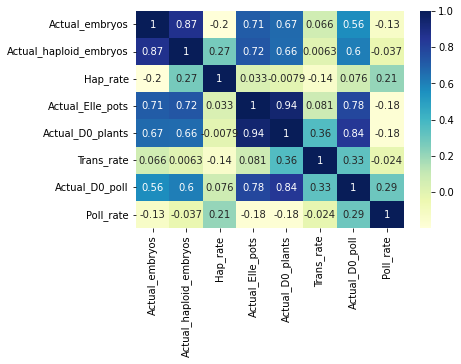

In [120]:
corr_heat_map=sns.heatmap(data.corr(),cmap='YlGnBu', annot=True )
plt.show()


#### correlation heat map is generated only for numeric variable/columns

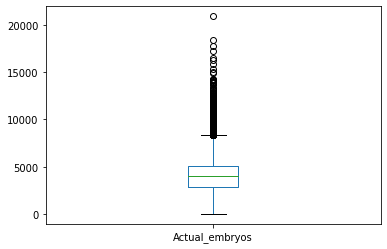

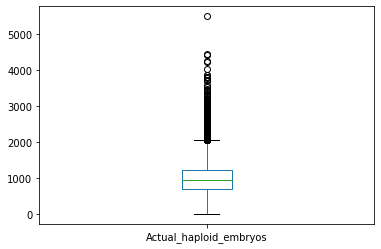

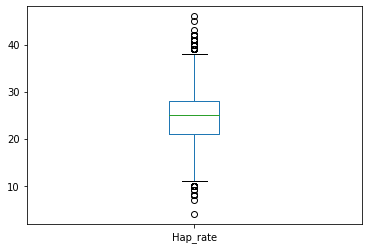

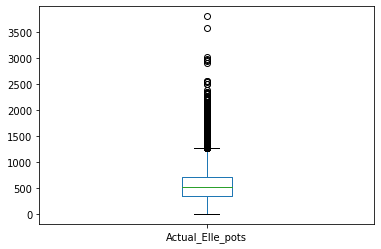

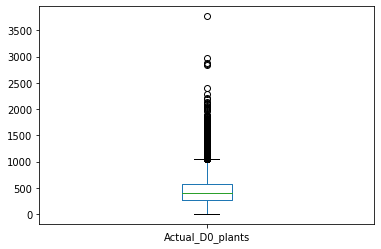

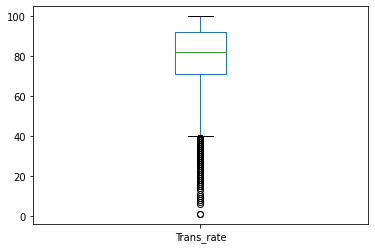

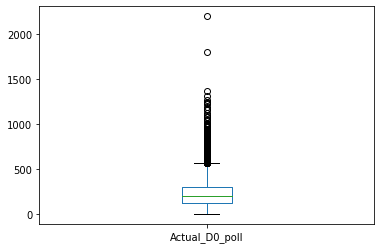

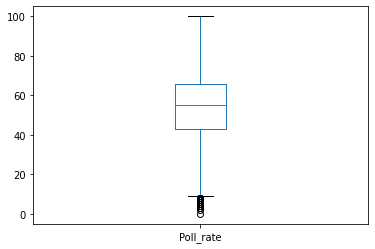

In [121]:
# plot box plot for numeric columns

#Use 'select_dtypes` method to select columns of dtype 'object'
num_fea=data.select_dtypes(exclude='object').copy()
num_fea.head()

for i in num_fea:
    plt.figure()
    data[i].plot.box()
    plt.show
plt.show()

# 2.3 Handling Outliers

## original dataset contains 14811 rows and 17 columns

In [91]:
#Dropping the outlier rows with standard deviation
factor = 3
upper_lim = data['Hap_rate'].mean () + data['Hap_rate'].std () * factor
lower_lim = data['Hap_rate'].mean () - data['Hap_rate'].std () * factor

data1 = data[(data['Hap_rate'] < upper_lim) & (data['Hap_rate'] > lower_lim)]
data1.shape

(14782, 15)

In [92]:
#Dropping the outlier rows with Percentiles
upper_lim = data['Hap_rate'].quantile(.95)
lower_lim = data['Hap_rate'].quantile(.05)

data2 = data[(data['Hap_rate'] < upper_lim) & (data['Hap_rate'] > lower_lim)]
data2.shape

(12928, 15)

In [57]:
# use IQR to create limit
q1 = data['Hap_rate'].quantile(0.25)
q3 = data['Hap_rate'].quantile(0.75)
iqr = q3-q1

# define lower and upper bound
low_lim = q1 - 1.5*iqr
up_lim = q3 + 1.5*iqr

# trim the outliers on feature 'Hap_rate' to lower and upper bound
#data.loc[(data['Hap_rate']>upper_bound),'Hap_rate']=upper_bound
#data.loc[(data['Hap_rate']<lower_bound),'Hap_rate']=lower_bound

col=data['Hap_rate']
outlier =[]
for x in col:
    if ((x> up_lim) or (x<low_lim)):
         outlier.append(x)
print('outliers in the dataset is:', outlier)

outliers in the dataset is: []


In [47]:
## customize outlier detection across features

In [60]:
col=['Hap_rate','Actual_embryos','Actual_haploid_embryos','Actual_Elle_pots','Actual_D0_plants','Trans_rate','Actual_D0_poll','Poll_rate']
for i in col:
   # use IQR to create limit
    q1 = data[i].quantile(0.25)
    q3 = data[i].quantile(0.75)
    iqr = q3-q1
    #print(iqr)
    
    # define lower and upper bound
    low_lim = q1 - 1.5*iqr
    up_lim = q3 + 1.5*iqr
    #print(low_lim)
    #print(up_lim)
    outlier=[]
    for val in data[i]:
        #print(val)
        if ((val> up_lim) or (val<low_lim)):
         outlier.append(val)
    #print(' outlier in the dataset is', outlier)
        
        
    

In [131]:
data.reset_index(inplace=True)
data.head()

,Request_id,GE_ID,Site,Year,Quarter,BreedingZone,EvaluationZone,HetGrp,Type,Actual_embryos,Actual_haploid_embryos,Hap_rate,Actual_Elle_pots,Actual_D0_plants,Trans_rate,Actual_D0_poll,Poll_rate
0,178950,67133087,AZ,2015,1,TE,NAWN,SSS,S,9425,1308,14,599.0,537.0,90.0,256.0,48.0
1,178955,67133419,AZ,2015,1,TE,NAWN,SSS,S,8029,1206,15,699.0,606.0,87.0,299.0,49.0
2,178969,67226512,AZ,2015,1,TE,NAWN,NSS,O,3373,976,29,466.0,270.0,58.0,196.0,73.0
3,178971,67226501,AZ,2015,1,TE,NAWN,NSS,O,4227,1189,28,518.0,310.0,60.0,184.0,59.0
4,178973,67226717,AZ,2015,1,TE,NAWN,NSS,O,5360,1277,24,623.0,516.0,83.0,286.0,55.0


In [132]:
data.to_csv('C:/Users/gellima/Desktop/Springboard_DScience/Data_Sci_Inhouse/data_wrangled2.csv', index=None)

In [133]:
new_data=pd.read_csv('data_wrangled2.csv')
new_data.shape

(14811, 17)

In [134]:
new_data.head()

,Request_id,GE_ID,Site,Year,Quarter,BreedingZone,EvaluationZone,HetGrp,Type,Actual_embryos,Actual_haploid_embryos,Hap_rate,Actual_Elle_pots,Actual_D0_plants,Trans_rate,Actual_D0_poll,Poll_rate
0,178950,67133087,AZ,2015,1,TE,NAWN,SSS,S,9425,1308,14,599.0,537.0,90.0,256.0,48.0
1,178955,67133419,AZ,2015,1,TE,NAWN,SSS,S,8029,1206,15,699.0,606.0,87.0,299.0,49.0
2,178969,67226512,AZ,2015,1,TE,NAWN,NSS,O,3373,976,29,466.0,270.0,58.0,196.0,73.0
3,178971,67226501,AZ,2015,1,TE,NAWN,NSS,O,4227,1189,28,518.0,310.0,60.0,184.0,59.0
4,178973,67226717,AZ,2015,1,TE,NAWN,NSS,O,5360,1277,24,623.0,516.0,83.0,286.0,55.0
